In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [26]:
import random
trainFile = '/content/drive/MyDrive/cifar-100-python/train'
testFile = '/content/drive/MyDrive/cifar-100-python/test'

trainDict = unpickle(trainFile)
testDict = unpickle(testFile)

trainLabels = trainDict[b'coarse_labels']
trainImgs = trainDict[b'data']

testLabels = testDict[b'coarse_labels']
testImgs = testDict[b'data']

randomSuperClassList = random.sample(range(20), 5)
print(randomSuperClassList)

trainIndices = []
testIndices = []

c1count = 0
c2count = 0
c3count = 0
c4count = 0
c5count = 0

while(c1count<180):
  idx = random.randint(0, len(trainLabels)-1)
  if(trainLabels[idx]==randomSuperClassList[0]):
    if(idx not in trainIndices):
      trainIndices.append(idx)
      c1count = c1count + 1

while(c2count<180):
  idx = random.randint(0, len(trainLabels)-1)
  if(trainLabels[idx]==randomSuperClassList[1]):
    if(idx not in trainIndices):
      trainIndices.append(idx)
      c2count = c2count + 1

while(c3count<180):
  idx = random.randint(0, len(trainLabels)-1)
  if(trainLabels[idx]==randomSuperClassList[2]):
    if(idx not in trainIndices):
      trainIndices.append(idx)
      c3count = c3count + 1

while(c4count<180):
  idx = random.randint(0, len(trainLabels)-1)
  if(trainLabels[idx]==randomSuperClassList[3]):
    if(idx not in trainIndices):
      trainIndices.append(idx)
      c4count = c4count + 1

while(c5count<180):
  idx = random.randint(0, len(trainLabels)-1)
  if(trainLabels[idx]==randomSuperClassList[4]):
    if(idx not in trainIndices):
      trainIndices.append(idx)
      c5count = c5count + 1

c1count = 0
c2count = 0
c3count = 0
c4count = 0
c5count = 0

while(c1count<20):
  idx = random.randint(0, len(testLabels)-1)
  if(testLabels[idx]==randomSuperClassList[0]):
    if(idx not in testIndices):
      testIndices.append(idx)
      c1count = c1count + 1

while(c2count<20):
  idx = random.randint(0, len(testLabels)-1)
  if(testLabels[idx]==randomSuperClassList[1]):
    if(idx not in testIndices):
      testIndices.append(idx)
      c2count = c2count + 1

while(c3count<20):
  idx = random.randint(0, len(testLabels)-1)
  if(testLabels[idx]==randomSuperClassList[2]):
    if(idx not in testIndices):
      testIndices.append(idx)
      c3count = c3count + 1

while(c4count<20):
  idx = random.randint(0, len(testLabels)-1)
  if(testLabels[idx]==randomSuperClassList[3]):
    if(idx not in testIndices):
      testIndices.append(idx)
      c4count = c4count + 1

while(c5count<20):
  idx = random.randint(0, len(testLabels)-1)
  if(testLabels[idx]==randomSuperClassList[4]):
    if(idx not in testIndices):
      testIndices.append(idx)
      c5count = c5count + 1

[9, 12, 13, 18, 0]


In [27]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

finalTrainImgs = []
finalTrainLabels = []
finalTestImgs = []
finalTestLabels = []

for i in range(len(trainIndices)):
  tempImg = np.array(trainImgs[trainIndices[i]]).reshape(3,32,32)
  tempImg = tempImg.transpose(1,2,0)
  finalTrainImgs.append(tempImg)
  finalTrainLabels.append(trainLabels[trainIndices[i]])

for i in range(len(testIndices)):
  tempImg = np.array(testImgs[testIndices[i]]).reshape(3,32,32)
  tempImg = tempImg.transpose(1,2,0)
  finalTestImgs.append(tempImg)
  finalTestLabels.append(testLabels[testIndices[i]])

finalTrainImgs = np.array(finalTrainImgs)
finalTestImgs = np.array(finalTestImgs)

finalTrainLabels = np.array(finalTrainLabels)
finalTestLabels = np.array(finalTestLabels)
print(finalTrainImgs.shape)
print(finalTestImgs.shape)

(900, 32, 32, 3)
(100, 32, 32, 3)


In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization

inpLayer = Input(shape=(32,32,3))
c1 = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(inpLayer)
m1 = MaxPooling2D((2,2))(c1)
b1 = BatchNormalization()(m1)
c2 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(b1)
m2 = MaxPooling2D((2,2))(c2)
b2 = BatchNormalization()(m2)
c3 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(b2)
m3 = MaxPooling2D((2,2))(c3)
b3 = BatchNormalization()(m3)

tc0 = Conv2DTranspose(128, (3,3), activation = 'relu', padding = 'same')(b3)
u0 = UpSampling2D((2,2))(tc0)
bn0 = BatchNormalization()(u0)
tc1 = Conv2DTranspose(64, (3,3), activation = 'relu', padding = 'same')(bn0)
u1 = UpSampling2D((2,2))(tc1)
bn1 = BatchNormalization()(u1)
tc2 = Conv2DTranspose(16, (3,3), activation = 'relu', padding = 'same')(bn1)
u2 = UpSampling2D((2,2))(tc2)
bn2 = BatchNormalization()(u2)
outLayer = Conv2D(3, (3,3), activation = 'relu', padding = 'same')(bn2)

In [29]:
AE = Model(inpLayer, outLayer)
AE.compile(optimizer = 'adam', loss = 'mse')

In [30]:
AE.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_12 (Bat  (None, 16, 16, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        9280      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0  

In [31]:
history = AE.fit(finalTrainImgs, finalTrainImgs, epochs = 50, batch_size = 8, shuffle = True)

Epoch 1/50
113/113 [==============================] - 8s 50ms/step - loss: 17100.3262
Epoch 2/50
113/113 [==============================] - 6s 51ms/step - loss: 13175.6914
Epoch 3/50
113/113 [==============================] - 5s 42ms/step - loss: 9069.6377
Epoch 4/50
113/113 [==============================] - 7s 61ms/step - loss: 5756.0322
Epoch 5/50
113/113 [==============================] - 5s 42ms/step - loss: 3710.3066
Epoch 6/50
113/113 [==============================] - 5s 41ms/step - loss: 2578.2639
Epoch 7/50
113/113 [==============================] - 7s 60ms/step - loss: 2023.7441
Epoch 8/50
113/113 [==============================] - 5s 45ms/step - loss: 1716.5325
Epoch 9/50
113/113 [==============================] - 7s 58ms/step - loss: 1564.6005
Epoch 10/50
113/113 [==============================] - 5s 47ms/step - loss: 1451.0970
Epoch 11/50
113/113 [==============================] - 5s 43ms/step - loss: 1274.0586
Epoch 12/50
113/113 [==============================] - 7s 61m

4/4 [==============================] - 2s 111ms/step


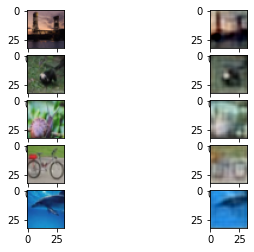

In [32]:
import matplotlib.pyplot as plt

decodedImgs = AE.predict(finalTestImgs)

tempList = list(finalTestLabels)

idx1 = tempList.index(randomSuperClassList[0])
idx2 = tempList.index(randomSuperClassList[1])
idx3 = tempList.index(randomSuperClassList[2])
idx4 = tempList.index(randomSuperClassList[3])
idx5 = tempList.index(randomSuperClassList[4])

orgImg1 = finalTestImgs[idx1]
orgImg2 = finalTestImgs[idx2]
orgImg3 = finalTestImgs[idx3]
orgImg4 = finalTestImgs[idx4]
orgImg5 = finalTestImgs[idx5]

decImg1 = decodedImgs[idx1]
decImg1 = decImg1.astype(np.uint8)
decImg2 = decodedImgs[idx2]
decImg2 = decImg2.astype(np.uint8)
decImg3 = decodedImgs[idx3]
decImg3 = decImg3.astype(np.uint8)
decImg4 = decodedImgs[idx4]
decImg4 = decImg4.astype(np.uint8)
decImg5 = decodedImgs[idx5]
decImg5 = decImg5.astype(np.uint8)

fig = plt.figure()
ax1 = fig.add_subplot(5,2,1)
ax1.imshow(orgImg1)
ax2 = fig.add_subplot(5,2,2)
ax2.imshow(decImg1)
ax3 = fig.add_subplot(5,2,3)
ax3.imshow(orgImg2)
ax4 = fig.add_subplot(5,2,4)
ax4.imshow(decImg2)
ax5 = fig.add_subplot(5,2,5)
ax5.imshow(orgImg3)
ax6 = fig.add_subplot(5,2,6)
ax6.imshow(decImg3)
ax7 = fig.add_subplot(5,2,7)
ax7.imshow(orgImg4)
ax8 = fig.add_subplot(5,2,8)
ax8.imshow(decImg4)
ax9 = fig.add_subplot(5,2,9)
ax9.imshow(orgImg5)
ax10 = fig.add_subplot(5,2,10)
ax10.imshow(decImg5)


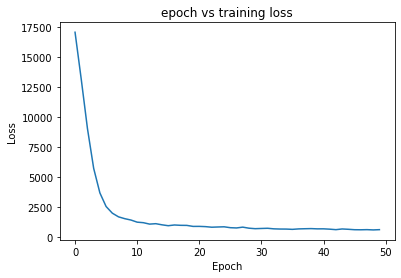

In [33]:
plt.plot(history.history['loss'], label='train')
plt.title('epoch vs training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

enc = Model(inpLayer, b3)
xTrainEmbed = enc.predict(finalTrainImgs)
xTestEmbed = enc.predict(finalTestImgs)

xTrainEmbed = np.reshape(xTrainEmbed, (xTrainEmbed.shape[0], xTrainEmbed.shape[1]*xTrainEmbed.shape[2]*xTrainEmbed.shape[3]))
xTestEmbed = np.reshape(xTestEmbed, (xTestEmbed.shape[0], xTestEmbed.shape[1]*xTestEmbed.shape[2]*xTestEmbed.shape[3]))

kernelSVM = SVC(kernel='rbf', gamma = 0.4).fit(xTrainEmbed, finalTrainLabels)

kernelPred1 = kernelSVM.predict(xTrainEmbed)
kernelPred2 = kernelSVM.predict(xTestEmbed)
kernelAccuracy1 = accuracy_score(finalTrainLabels, kernelPred1)
kernelAccuracy2 = accuracy_score(finalTestLabels, kernelPred2)
print("training accuracy in percent", kernelAccuracy1*100)
print("test accuracy in percent", kernelAccuracy2*100)


4/4 [==============================] - 0s 15ms/step
training accuracy in percent 100.0
test accuracy in percent 36.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

file = '/content/drive/MyDrive/Sapodillas_and_Kiwis.xlsx'
df = pd.read_excel(file)

x = df.iloc[:, 0:2]
y = df.iloc[:,2]

listY = []
for i in range(y.shape[0]):
  if(y.iloc[i]=='Kiwi'):
    listY.append(1)
  else:
    listY.append(0)

listY = np.array(listY)

y = pd.DataFrame(listY, columns =['class'])

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.15, random_state=0)

xMax = xTrain.iloc[:, 0].max() + 0.5
xMin = xTrain.iloc[:, 0].min() - 0.5
yMax = xTrain.iloc[:, 1].max() + 0.5
yMin = xTrain.iloc[:, 1].min() - 0.5

step = 0.03

meshX, meshY = np.meshgrid(np.arange(xMin, xMax, step), np.arange(yMin, yMax, step))

c = []
for i in range(0, yTrain.shape[0]):
  c.append(yTrain.iloc[i])

In [ ]:
def plotDecisionBoundary(meshX, meshY, pred, c, xTrain, titleStr):
  plt.contourf(meshX, meshY, pred, cmap='RdBu', alpha=0.5)
  plt.scatter(xTrain.iloc[:, 0], xTrain.iloc[:, 1], c=c, cmap='PRGn')
  plt.xlim(meshX.min(), meshX.max())
  plt.ylim(meshY.min(), meshY.max())
  plt.xlabel('weight')
  plt.ylabel('size')
  plt.title(titleStr)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


accuracy in percent 100.0


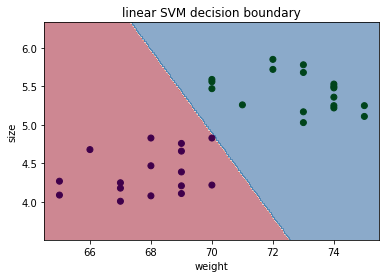

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

linearSVM = SVC(kernel='linear').fit(xTrain, yTrain)

linearPred = linearSVM.predict(xTest)
accuracy = accuracy_score(yTest, linearPred)
print("accuracy in percent", accuracy*100)

predL = linearSVM.predict(np.c_[meshX.ravel(), meshY.ravel()])
predL = predL.reshape(meshX.shape)

plotDecisionBoundary(meshX, meshY, predL, c, xTrain, "linear SVM decision boundary")

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


accuracy in percent 100.0


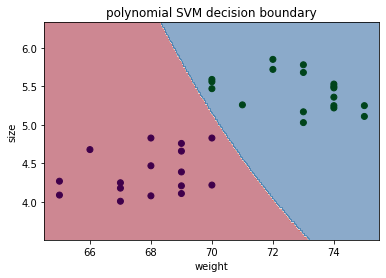

In [ ]:
polynomialSVM = SVC(kernel='poly', degree=10).fit(xTrain, yTrain)

polynomialPred = polynomialSVM.predict(xTest)
polyAccuracy = accuracy_score(yTest, polynomialPred)
print("accuracy in percent", polyAccuracy*100)

predP = polynomialSVM.predict(np.c_[meshX.ravel(), meshY.ravel()])
predP = predP.reshape(meshX.shape)

plotDecisionBoundary(meshX, meshY, predP, c, xTrain, "polynomial SVM decision boundary")

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


accuracy in percent 100.0


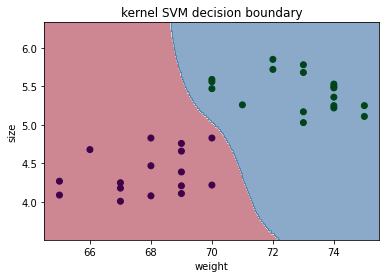

In [ ]:
kernelSVM = SVC(kernel='rbf', gamma=1.3).fit(xTrain, yTrain)

kernelPred = kernelSVM.predict(xTest)
kernelAccuracy = accuracy_score(yTest, kernelPred)
print("accuracy in percent", kernelAccuracy*100)

predK = kernelSVM.predict(np.c_[meshX.ravel(), meshY.ravel()])
predK = predK.reshape(meshX.shape)

plotDecisionBoundary(meshX, meshY, predK, c, xTrain, "kernel SVM decision boundary")

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

(xTrain, yTrain), (xTest, yTest) = fashion_mnist.load_data()

xTrain = xTrain.reshape(xTrain.shape[0], xTrain.shape[1]*xTrain.shape[2])
xTest = xTest.reshape(xTest.shape[0], xTest.shape[1]*xTest.shape[2])

xTrain = np.dstack([xTrain]*3)
xTest = np.dstack([xTest]*3)

xTrain = xTrain.reshape(xTrain.shape[0],28,28,3)
xTest = xTest.reshape(xTest.shape[0],28,28,3)

xTrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((56,56))) for im in xTrain])
xTest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((56,56))) for im in xTest])

yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.vgg16 import preprocess_input

VGG16model = VGG16(weights='imagenet', include_top=False, input_shape=xTrain[0].shape)
xTrain = preprocess_input(xTrain)
xTest = preprocess_input(xTest)

for vgg16Layer in VGG16model.layers:
    vgg16Layer.trainable = False

inpLayer = VGG16model.input
outLayer = VGG16model.output

flattenOut = Flatten()(outLayer)
L1 = Dense(256, activation = 'relu', use_bias=True)(flattenOut)
L2 = Dense(64, activation = 'relu', use_bias=True)(L1)
L3 = Dense(64, activation = 'relu', use_bias=True)(L2)
L4 = Dense(10, activation = 'softmax')(L3)

VGG16m = Model(inputs=inpLayer, outputs=L4)

VGG16m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
VGG16m.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=10, batch_size=64)

VGG16loss, VGG16accuracy = VGG16m.evaluate(xTest, yTest)
print('Test loss :', VGG16loss)
print('Test accuracy (in percent) :', VGG16accuracy*100)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
938/938 [==============================] - 39s 30ms/step - loss: 0.5419 - accuracy: 0.8162 - val_loss: 0.4405 - val_accuracy: 0.8393
Epoch 2/10
938/938 [==============================] - 25s 27ms/step - loss: 0.3738 - accuracy: 0.8619 - val_loss: 0.4397 - val_accuracy: 0.8453
Epoch 3/10
938/938 [==============================] - 25s 26ms/step - loss: 0.3307 - accuracy: 0.8771 - val_loss: 0.4140 - val_accuracy: 0.8560
Epoch 4/10
938/938 [==============================] - 25s 26ms/step - loss: 0.3036 - accuracy: 0.8882 - val_loss: 0.4135 - val_accuracy: 0.8594
Epoch 5/10
938/938 [==============================] - 27s 29ms/step - loss: 0.2749 - accuracy: 0.8977 - val_loss: 0.3943 - val_accuracy: 0.8670
Epoch 6/10
938/938 [==============================] - 27s 29ms/step - loss: 0.2517 - accuracy: 0.9046 - val_loss: 0.4243 - val_accuracy: 0.8692
Epoch 7/10
938/938 [==============================] - 27s 29ms/step - l

In [2]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

VGG19model = VGG19(weights='imagenet', include_top=False, input_shape=xTrain[0].shape)
xTrain = preprocess_input(xTrain)
xTest = preprocess_input(xTest)

for vgg19Layer in VGG19model.layers:
    vgg19Layer.trainable = False

inpLayer = VGG19model.input
outLayer = VGG19model.output

flattenOut = Flatten()(outLayer)
L1 = Dense(256, activation = 'relu', use_bias=True)(flattenOut)
L2 = Dense(64, activation = 'relu', use_bias=True)(L1)
L3 = Dense(64, activation = 'relu', use_bias=True)(L2)
L4 = Dense(10, activation = 'softmax')(L3)

VGG19m = Model(inputs=inpLayer, outputs=L4)

VGG19m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
VGG19m.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=10, batch_size=64)

VGG19loss, VGG19accuracy = VGG19m.evaluate(xTest, yTest)
print('Test loss :', VGG19loss)
print('Test accuracy (in percent) :', VGG19accuracy*100)

Epoch 1/10
938/938 [==============================] - 44s 36ms/step - loss: 0.5455 - accuracy: 0.8110 - val_loss: 0.4318 - val_accuracy: 0.8442
Epoch 2/10
938/938 [==============================] - 31s 34ms/step - loss: 0.3818 - accuracy: 0.8602 - val_loss: 0.4081 - val_accuracy: 0.8523
Epoch 3/10
938/938 [==============================] - 30s 32ms/step - loss: 0.3369 - accuracy: 0.8767 - val_loss: 0.4023 - val_accuracy: 0.8575
Epoch 4/10
938/938 [==============================] - 31s 33ms/step - loss: 0.3068 - accuracy: 0.8856 - val_loss: 0.3945 - val_accuracy: 0.8650
Epoch 5/10
938/938 [==============================] - 32s 34ms/step - loss: 0.2824 - accuracy: 0.8950 - val_loss: 0.4054 - val_accuracy: 0.8572
Epoch 6/10
938/938 [==============================] - 32s 34ms/step - loss: 0.2593 - accuracy: 0.9024 - val_loss: 0.3953 - val_accuracy: 0.8663
Epoch 7/10
938/938 [==============================] - 32s 34ms/step - loss: 0.2370 - accuracy: 0.9114 - val_loss: 0.4262 - val_accuracy:

In [2]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

resNet50V2model = ResNet50V2(weights='imagenet', include_top=False, input_shape=xTrain[0].shape)
xTrain = preprocess_input(xTrain)
xTest = preprocess_input(xTest)

for resNet50V2Layer in resNet50V2model.layers:
    resNet50V2Layer.trainable = False

inpLayer = resNet50V2model.input
outLayer = resNet50V2model.output

flattenOut = Flatten()(outLayer)
L1 = Dense(256, activation = 'relu', use_bias=True)(flattenOut)
L2 = Dense(64, activation = 'relu', use_bias=True)(L1)
L3 = Dense(64, activation = 'relu', use_bias=True)(L2)
L4 = Dense(10, activation = 'softmax')(L3)

resnet50V2m = Model(inputs=inpLayer, outputs=L4)

resnet50V2m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet50V2m.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=10, batch_size=64)

resnet50V2Loss, resnet50V2accuracy = resnet50V2m.evaluate(xTest, yTest)
print('Test loss :', resnet50V2Loss)
print('Test accuracy (in percent) :', resnet50V2accuracy*100)

Epoch 1/10
938/938 [==============================] - 40s 29ms/step - loss: 0.4752 - accuracy: 0.8310 - val_loss: 0.3864 - val_accuracy: 0.8622
Epoch 2/10
938/938 [==============================] - 23s 25ms/step - loss: 0.3245 - accuracy: 0.8799 - val_loss: 0.3740 - val_accuracy: 0.8628
Epoch 3/10
938/938 [==============================] - 24s 26ms/step - loss: 0.2707 - accuracy: 0.9000 - val_loss: 0.3829 - val_accuracy: 0.8658
Epoch 4/10
938/938 [==============================] - 24s 26ms/step - loss: 0.2356 - accuracy: 0.9129 - val_loss: 0.3717 - val_accuracy: 0.8722
Epoch 5/10
938/938 [==============================] - 22s 24ms/step - loss: 0.2055 - accuracy: 0.9235 - val_loss: 0.4274 - val_accuracy: 0.8623
Epoch 6/10
938/938 [==============================] - 24s 26ms/step - loss: 0.1784 - accuracy: 0.9335 - val_loss: 0.4101 - val_accuracy: 0.8678
Epoch 7/10
938/938 [==============================] - 22s 24ms/step - loss: 0.1539 - accuracy: 0.9429 - val_loss: 0.4150 - val_accuracy:

In [2]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

mobilenetModel = MobileNet(weights='imagenet', include_top=False, input_shape=xTrain[0].shape)
xTrain = preprocess_input(xTrain)
xTest = preprocess_input(xTest)

for mobilenetLayer in mobilenetModel.layers:
    mobilenetLayer.trainable = False

inpLayer = mobilenetModel.input
outLayer = mobilenetModel.output

flattenOut = Flatten()(outLayer)
L1 = Dense(256, activation = 'relu', use_bias=True)(flattenOut)
L2 = Dense(64, activation = 'relu', use_bias=True)(L1)
L3 = Dense(64, activation = 'relu', use_bias=True)(L2)
L4 = Dense(10, activation = 'softmax')(L3)

mobilenetM = Model(inputs=inpLayer, outputs=L4)

mobilenetM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobilenetM.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=10, batch_size=64)

mobilenetLoss, mobilenetaccuracy = mobilenetM.evaluate(xTest, yTest)
print('Test loss :', mobilenetLoss)
print('Test accuracy (in percent) :', mobilenetaccuracy*100)

Epoch 1/10
938/938 [==============================] - 22s 12ms/step - loss: 1.4797 - accuracy: 0.4727 - val_loss: 1.3807 - val_accuracy: 0.4922
Epoch 2/10
938/938 [==============================] - 10s 10ms/step - loss: 1.3283 - accuracy: 0.5226 - val_loss: 1.3240 - val_accuracy: 0.5212
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 1.2919 - accuracy: 0.5350 - val_loss: 1.3077 - val_accuracy: 0.5279
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 1.2678 - accuracy: 0.5445 - val_loss: 1.2920 - val_accuracy: 0.5297
Epoch 5/10
938/938 [==============================] - 10s 10ms/step - loss: 1.2504 - accuracy: 0.5489 - val_loss: 1.2779 - val_accuracy: 0.5411
Epoch 6/10
938/938 [==============================] - 10s 10ms/step - loss: 1.2377 - accuracy: 0.5561 - val_loss: 1.2704 - val_accuracy: 0.5422
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 1.2255 - accuracy: 0.5587 - val_loss: 1.2669 - val_accuracy: 

In [2]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

efficientNetModel = EfficientNetB0(weights='imagenet', include_top=False, input_shape=xTrain[0].shape)
xTrain = preprocess_input(xTrain)
xTest = preprocess_input(xTest)

for efficientNetLayer in efficientNetModel.layers:
    efficientNetLayer.trainable = False

inpLayer = efficientNetModel.input
outLayer = efficientNetModel.output

flattenOut = Flatten()(outLayer)
L1 = Dense(256, activation = 'relu', use_bias=True)(flattenOut)
L2 = Dense(64, activation = 'relu', use_bias=True)(L1)
L3 = Dense(64, activation = 'relu', use_bias=True)(L2)
L4 = Dense(10, activation = 'softmax')(L3)

efficientNetM = Model(inputs=inpLayer, outputs=L4)

efficientNetM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
efficientNetM.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=10, batch_size=64)

efficientNetLoss, efficientNetaccuracy = efficientNetM.evaluate(xTest, yTest)
print('Test loss :', efficientNetLoss)
print('Test accuracy (in percent) :', efficientNetaccuracy*100)

Epoch 1/10
938/938 [==============================] - 35s 22ms/step - loss: 0.4110 - accuracy: 0.8517 - val_loss: 0.3435 - val_accuracy: 0.8725
Epoch 2/10
938/938 [==============================] - 17s 18ms/step - loss: 0.3142 - accuracy: 0.8839 - val_loss: 0.2917 - val_accuracy: 0.8924
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 0.2822 - accuracy: 0.8952 - val_loss: 0.2874 - val_accuracy: 0.8985
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 0.2650 - accuracy: 0.9005 - val_loss: 0.2823 - val_accuracy: 0.8980
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 0.2479 - accuracy: 0.9073 - val_loss: 0.2902 - val_accuracy: 0.8971
Epoch 6/10
938/938 [==============================] - 16s 17ms/step - loss: 0.2344 - accuracy: 0.9111 - val_loss: 0.2812 - val_accuracy: 0.8986
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2282 - accuracy: 0.9150 - val_loss: 0.2737 - val_accuracy: